<a href="https://colab.research.google.com/github/hajihye123/MachineLearning_edwith/blob/main/4_%EC%84%A0%ED%98%95%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손으로 쓴 숫자 이미지(MNIST)

* TPE
    * T : 숫자를 분류
    * P : 정확도
    * E : 손으로 숫자 이미지(MNIST)

* 분류 순서
  - 1. 데이터를 불러온다.
  - 2. 데이터를 확인한다(시각화!).
  - 3. 데이터를 전처리한다.
  - 4. 머신러닝 알고리즘에 적합하도록 데이터를 준비한다.
  - 5. 머신러닝 알고리즘을 적용한다.
  - 6. 머신러닝 알고리즘을 평가한다.
  - 7. 머신러닝 알고리즘을 개선한다.
  - 8. 원하는 결과가 나올 때까지 1~7을 반복한다.

# Digits를 사용해서 선형 분류를 진행

In [2]:
# 데이터를 불러온다.
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
# 데이터를 확인한다(시각화!).
print(f'Image Data Shape: {digits.data.shape}') # 이미지 1797장, 8*8 픽셀
print(f'Image Label Shape: {digits.target.shape}')

Image Data Shape: (1797, 64)
Image Label Shape: (1797,)


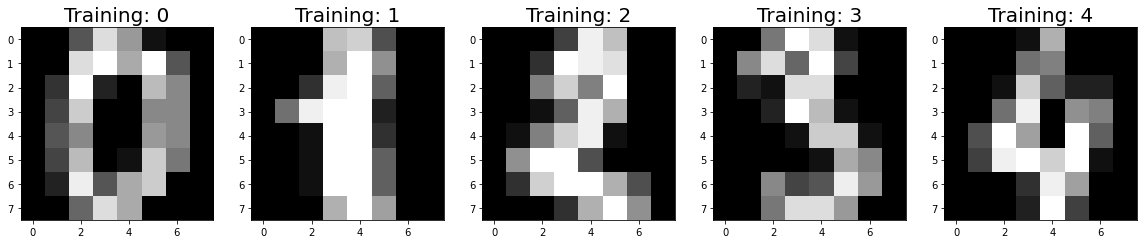

In [4]:
# 데이터를 확인하자(시각화)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,4)) # 이미지 사이즈
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1) # 1행 5열
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray) # 이미지 출력, 8*8=64
  plt.title(f'Training: {label}', fontsize=20)

In [ ]:
# 데이터를 전처리한다. -> scikit-learn에서 제공하는 데이터는 전처리가 이미 되어있음

In [5]:
# 머신러닝 알고리즘에 적합하도록 데이터를 준비한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=82)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1257, 64)
X_test shape: (540, 64)
y_train shape: (1257,)
y_test shape: (540,)


In [10]:
# 머신러닝 알고리즘을 적용한다.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000) # 5000번 반복
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# 머신러닝 알고리즘을 평가한다.
model.predict(X_test[0].reshape(1,-1)) # reshape: 차원 변경

array([2])

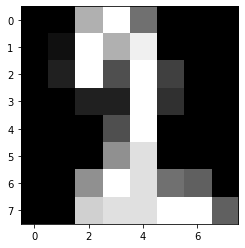

In [12]:
  plt.imshow(np.reshape(X_test[0], (8,8)), cmap=plt.cm.gray) # 이미지 출력, 8*8=64

In [13]:
score = model.score(X_test, y_test)
print(f'score: {score}') # 정확도 출력

score: 0.9574074074074074


## MNIST를 사용해서 선형 분류를 진행

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') # openml에서 파일 다운로드

In [16]:
print(mnist.url)
print(f'Image Data Shape: {mnist.data.shape}') # 784 = 28 * 28
print(f'Image Label Shape: {mnist.target.shape}')

https://www.openml.org/d/554
Image Data Shape: (70000, 784)
Image Label Shape: (70000,)


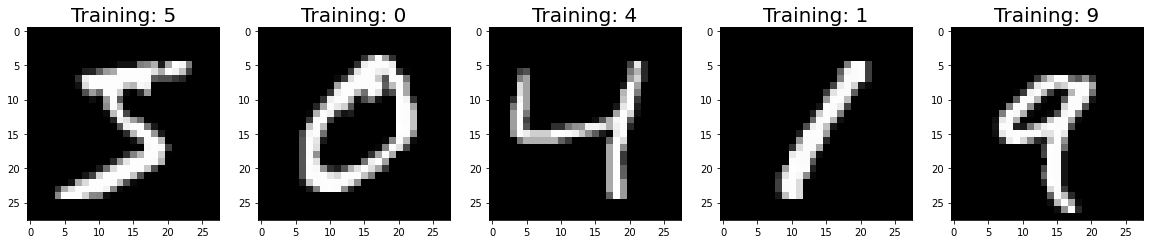

In [18]:
# 데이터를 확인하자(시각화)
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,4)) # 이미지 사이즈
for index, (image, label) in enumerate(zip(mnist.data[0:5], mnist.target[0:5])):
  plt.subplot(1, 5, index + 1) # 1행 5열
  plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray) # 이미지 출력, 크기 28 * 28
  plt.title(f'Training: {label}', fontsize=20)

In [19]:
# 머신러닝 알고리즘에 적합하도록 데이터를 준비한다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=82)

In [20]:
# 머신러닝 알고리즘을 적용한다.
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000) # 5000번 반복... 7만개 5000번은 부족함
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
score = model.score(X_test, y_test)
print(f'score: {score}') # 정확도 출력

score: 0.9133809523809524


In [22]:
predictions = model.predict(X_test)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
misclassificiedIndexes = []
for label, predict, in zip(y_test, predictions):
  if label != predict:
    misclassificiedIndexes.append(index)
  index += 1

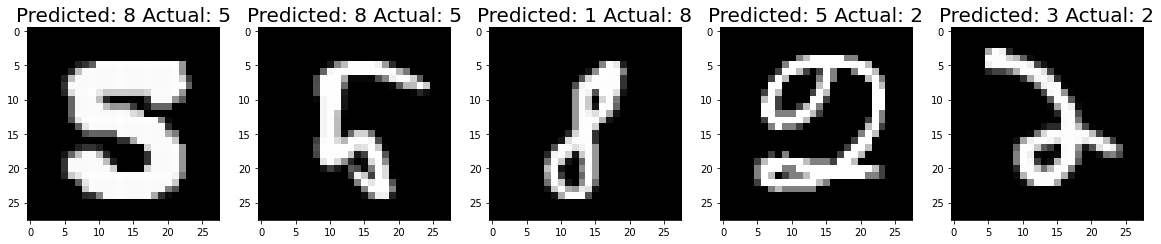

In [26]:
plt.figure(figsize=(20,4)) # 이미지 사이즈
for plotIndex, badIndex in enumerate(misclassificiedIndexes[0:5]):
  plt.subplot(1, 5, plotIndex + 1) # 1행 5열
  plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray) # 틀린 이미지 출력
  plt.title(f'Predicted: {predictions[badIndex]} Actual: {y_test[badIndex]}', fontsize=20)